# Importing the necessary libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset


In [33]:
df = pd.read_csv("C:\\Users\\meghn\\Documents\\ProdigyInfotech_Tasks\\TASK_5\\US_Accidents_March23.csv")

In [34]:
df.shape

(7728394, 46)

# Checking for null/missing values in the dataset

In [36]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

# Dropping the columns with huge number of null values

In [38]:
df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)

In [43]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\meghn\AppData\Local\Temp\ipykernel_26692\106596135.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [44]:
df.drop(columns=['Wind_Speed(mph)', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)'], axis=1, inplace=True)

df.isna().sum()



# Checking for duplicate values

In [56]:
df.duplicated().sum()

0

# Explorotary Data Analysis

## City with most Number of accidents

In [61]:
city_acc = df['City'].value_counts().sort_values(ascending = False).reset_index()

In [63]:
city_acc

,City,count
0,Miami,187170
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
...,...,...
13673,Bon Secour,1
13674,Sidney Center,1
13675,Fluker,1
13676,Mapleville,1


## Top 10 cities with most number of accidents

C:\Users\meghn\AppData\Local\Temp\ipykernel_26692\2069153498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City',y='count',data= city_acc.head(10),palette='viridis')


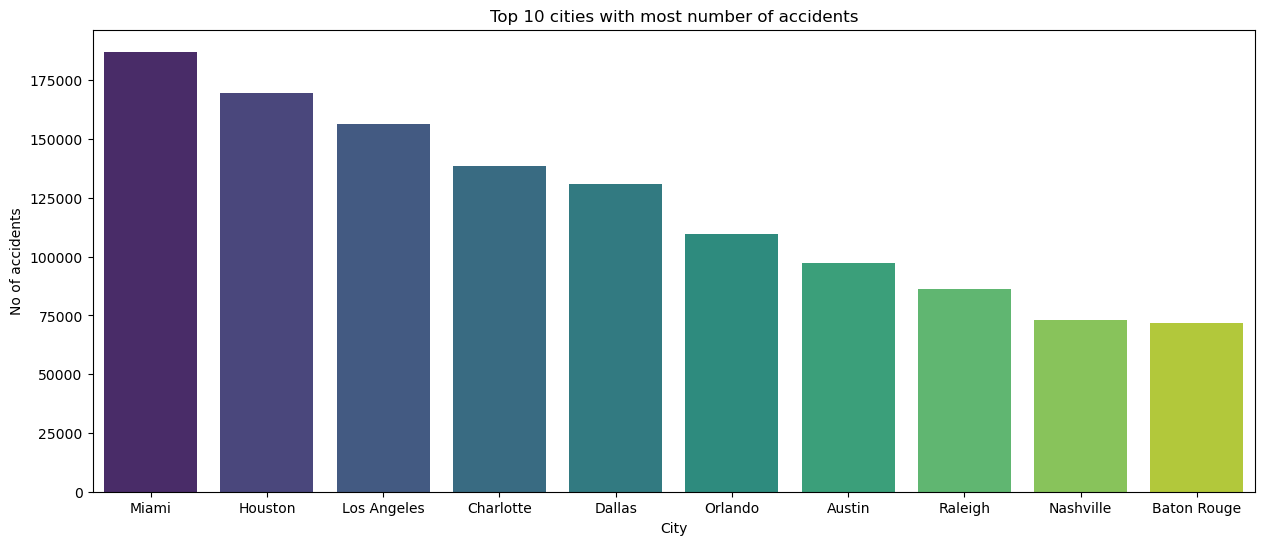

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.head(10),palette='viridis')
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

## Bottom 10 cities with least number of accidents

C:\Users\meghn\AppData\Local\Temp\ipykernel_26692\327435523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City',y='count',data= city_acc.tail(10),palette='viridis')


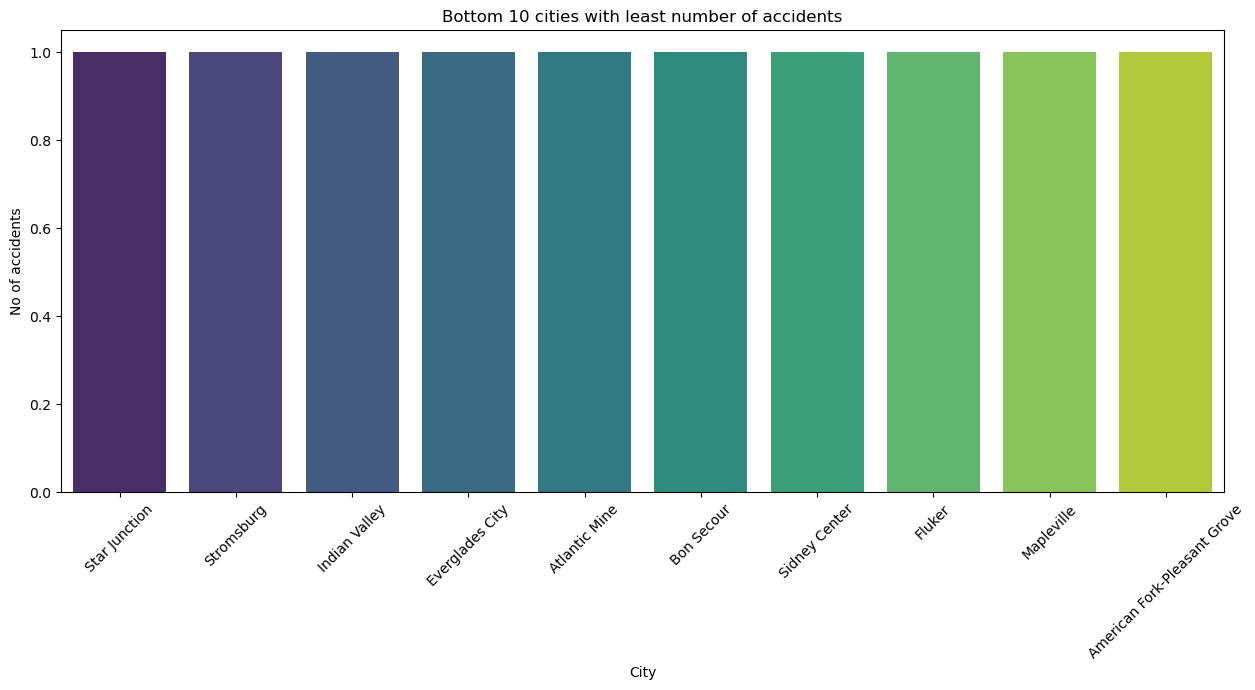

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.tail(10),palette='viridis')
plt.title("Bottom 10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()

## State with most and least Number of accidents

In [72]:
state_acc = df['State'].value_counts().sort_values(ascending = False).reset_index()
state_acc

,State,count
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960
5,NC,338199
6,VA,303301
7,PA,296620
8,MN,192084
9,OR,179660


C:\Users\meghn\AppData\Local\Temp\ipykernel_26692\3569853493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State',y='count',data= state_acc.head(5),palette='rocket')


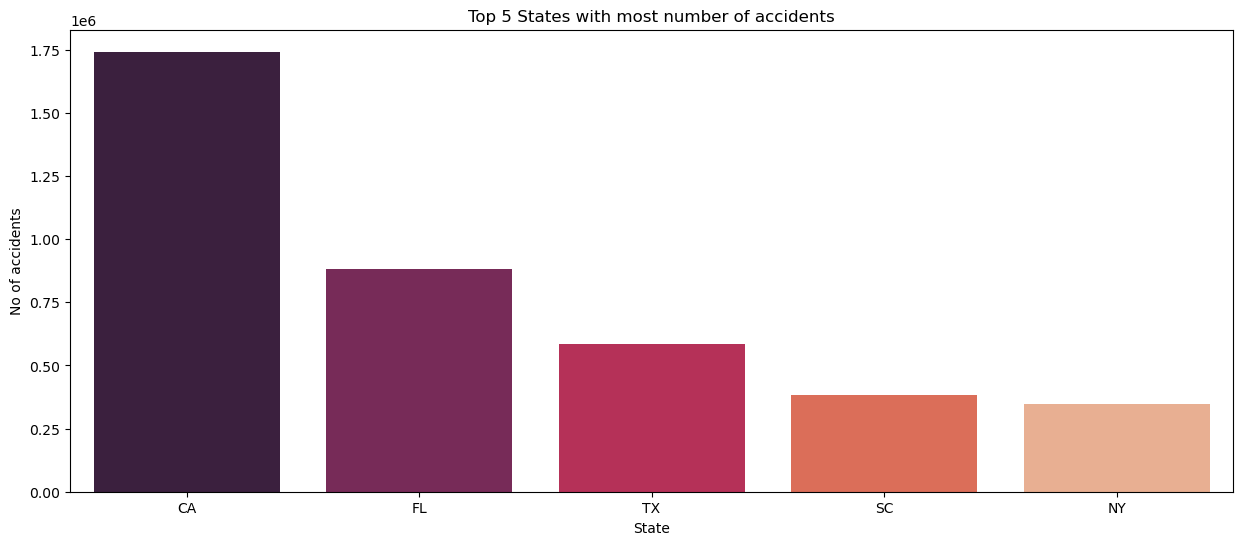

C:\Users\meghn\AppData\Local\Temp\ipykernel_26692\3569853493.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State',y='count',data= state_acc.tail(5),palette='rocket')


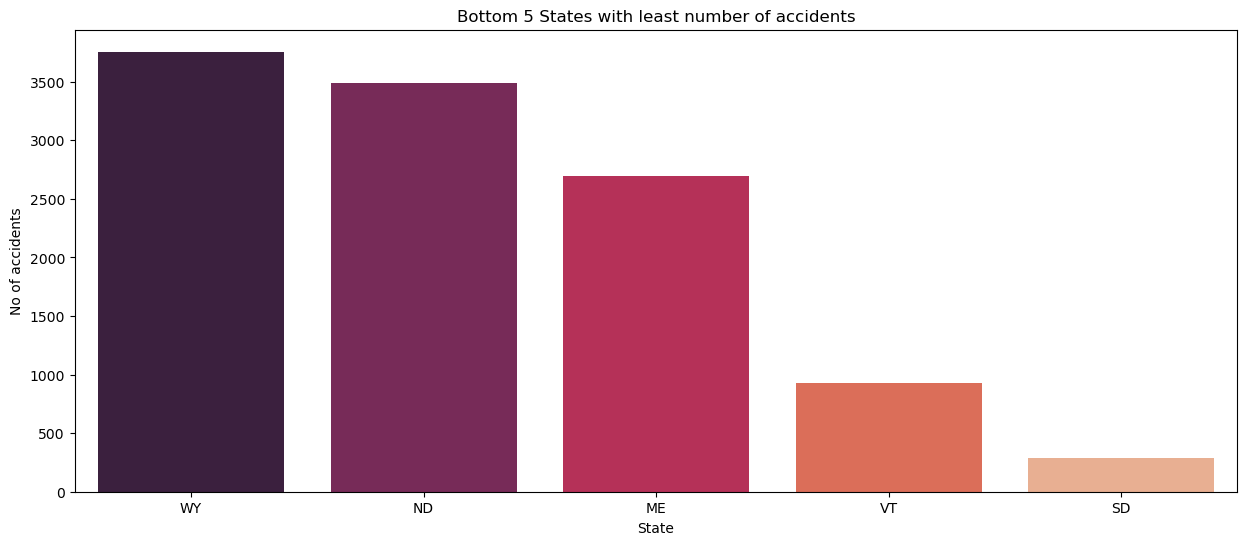

In [74]:
## States with most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.head(5),palette='rocket')
plt.title("Top 5 States with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

## States with the least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.tail(5),palette='rocket')
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("No of accidents")
plt.show()

In [78]:
#Observations:

#Miami is the city with most number of accidents
#starjunction, stomsburg are among the cities with least number of accidents
#California is the state with highest cases of accident
#South Dakota(SD) is the state with least cases of accident

In [80]:
df['Severity'].value_counts().index

Index([2, 3, 4, 1], dtype='int64', name='Severity')

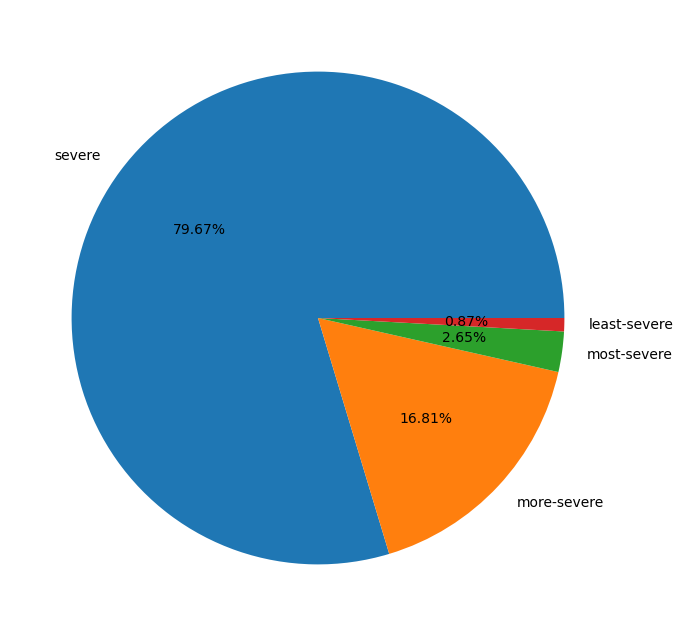

In [82]:
plt.figure(figsize=(8,8))
plt.pie(df['Severity'].value_counts(),labels=['severe','more-severe','most-severe','least-severe'],autopct="%1.2f%%")
plt.show()

In [84]:
# Convert the 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the year from the 'Start_Time' column and store it in a new column called 'Year'
df['Year'] = df['Start_Time'].dt.year

# Display the first few rows to verify
print(df[['Start_Time', 'Year']].head())

           Start_Time    Year
0 2016-02-08 05:46:00  2016.0
1 2016-02-08 06:07:59  2016.0
2 2016-02-08 06:49:27  2016.0
3 2016-02-08 07:23:34  2016.0
4 2016-02-08 07:39:07  2016.0


In [86]:
df['Year'].value_counts()

Year
2021.0    1412433
2022.0    1268806
2020.0    1161598
2019.0     954302
2018.0     893426
2017.0     717290
2016.0     410821
2023.0     166552
Name: count, dtype: int64

## Years with most number of accidents

C:\Users\meghn\AppData\Local\Temp\ipykernel_26692\2601685927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year',y='count',data=year_count,palette='rocket')


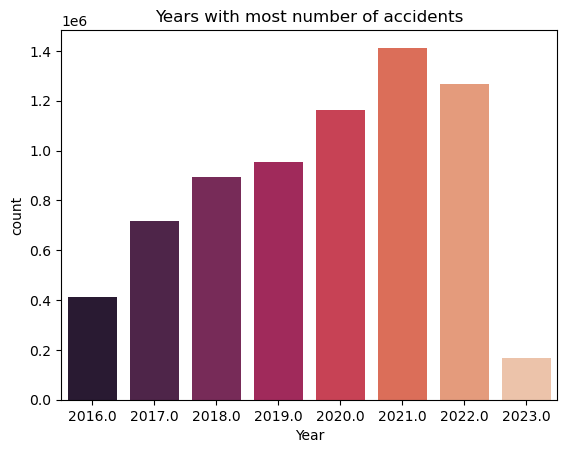

In [89]:
year_count = df['Year'].value_counts().reset_index()
sns.barplot(x='Year',y='count',data=year_count,palette='rocket')
plt.title("Years with most number of accidents")
plt.show()

## Number of accidents at different time zones

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the time and store it in a new column 'Time'
df['Time'] = df['Start_Time'].dt.time

# Function to categorize time
def categorize_time(time):
    if pd.isna(time):
        return 'Unknown'
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('17:00:00').time() and time < pd.to_datetime('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'Time_Zone'
df['Time_Zone'] = df['Time'].apply(categorize_time)

# Filter out 'Unknown' time zones for plotting
filtered_df = df[df['Time_Zone'] != 'Unknown']


# Count the number of accidents in each timezone
time_zone_counts = filtered_df['Time_Zone'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=time_zone_counts.index, y=time_zone_counts.values, palette='rocket')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Time of Day')
plt.show()


## histogram to show the distribution of accidents through the time zones

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Time_Zone'], bins=4, kde=False, color='green')
plt.xlabel('Time Zone')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Time Zone')
plt.show()

## Weather conditions at the time of accidents

C:\Users\meghn\AppData\Local\Temp\ipykernel_26692\1844928386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count',y='Weather_Condition',data=weather[:10],orient='horizontal',palette='viridis')


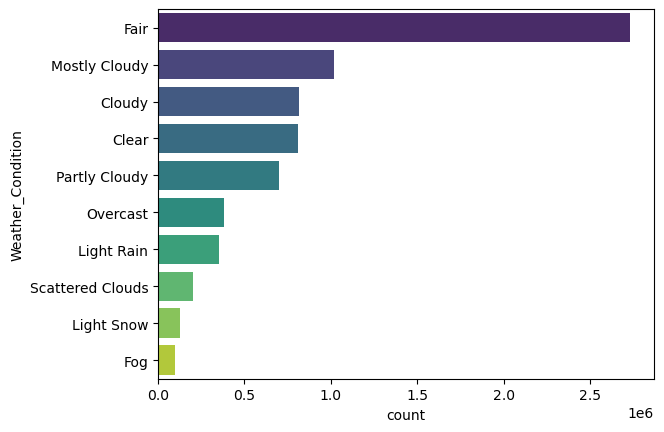

In [97]:
weather = df['Weather_Condition'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(x='count',y='Weather_Condition',data=weather[:10],orient='horizontal',palette='viridis')
plt.show()

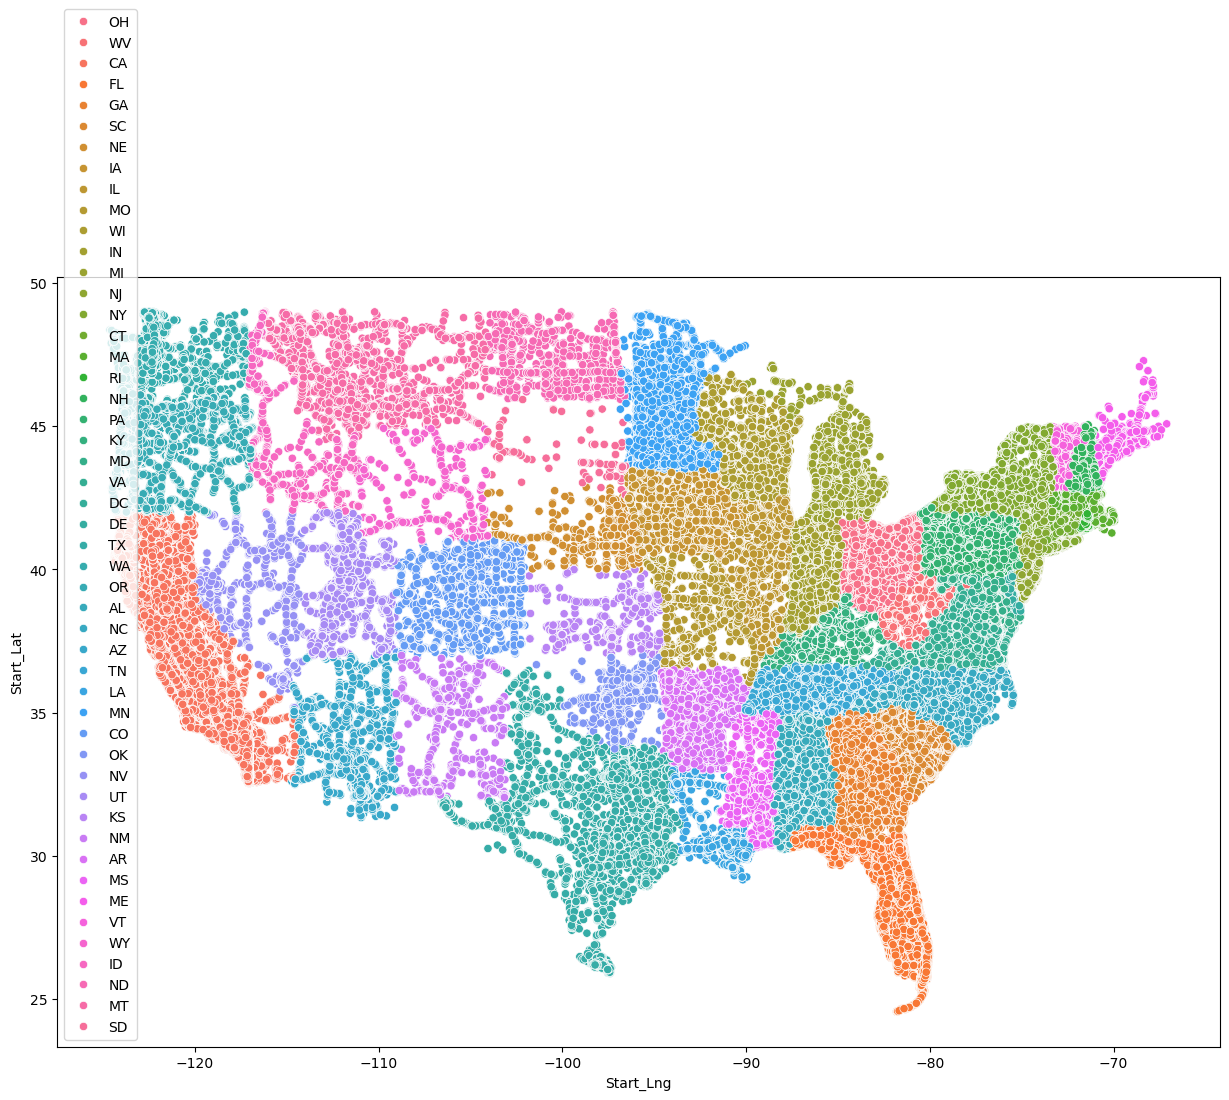

In [99]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['State'])
plt.legend(loc="lower left")
plt.show()

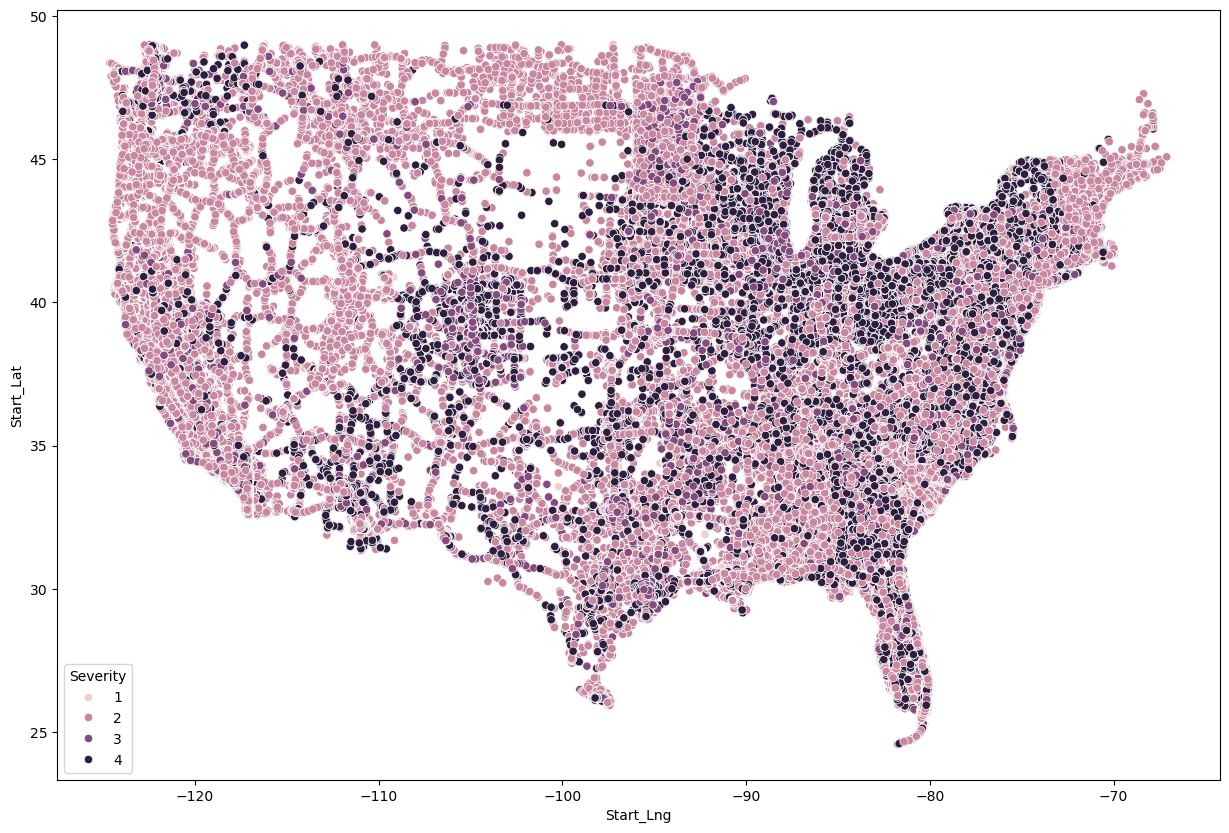

In [100]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['Severity'])
plt.show()

 ## Conclusion:
In this traffic data analysis project, we undertook a comprehensive examination of the accident records, including data cleaning, exploratory data analysis (EDA), and visualization. Here are the key findings and observations from the analysis:

#### 1.City-wise Accident Distribution:

- Miami stands out as the city with the highest number of accidents. This could be attributed to its high population density and traffic volume.
   
- On the other hand, Star Junction and Stromsburg are among the cities with the least number of accidents, possibly due to their smaller size and lower traffic.
   
#### 2.State-wise Accident Distribution:
- California reports the highest number of accident cases, which aligns with its large population and extensive road network.
   - 
Conversely, South Dakota (SD) has the least number of accident cases, likely due to its lower population density and traffic volume.
   
#### 3.Yearly Accident Rates:
- The year 2021 recorded the highest accident rates, indicating a potential increase in traffic or changes in reporting during this period.
     
#### 4.Accident Severity:
- The severity of accidents is categorized into four levels: 1, 2, 3, and 4.
    - 
Most people experienced accidents at severity level 2, suggesting that while many accidents occurred, they were not extremely severe. 
#### 5.Weather Conditions During Accident
- Fair weather conditions were prevalent during most of the accidents, indicating that factors other than adverse weather, such as driver behavior or traffic congestion, may play a significant role in accident occurrences.s.
    
#### 6.Time of Day for Accident:

- Most accidents occurred in the morning, potentially due to rush hour traffic when more people are commuting to work or school.


 
These observations provide valuable insights into traffic patterns and accident hotspots, which can inform policy decisions, urban planning, and safety measures aimed at reducing the incidence and severity of accidents.